In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns#
import numpy as np

In [86]:
df=pd.read_csv('Housing.csv')

In [87]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [89]:
df.shape

(545, 13)

In [90]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [91]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

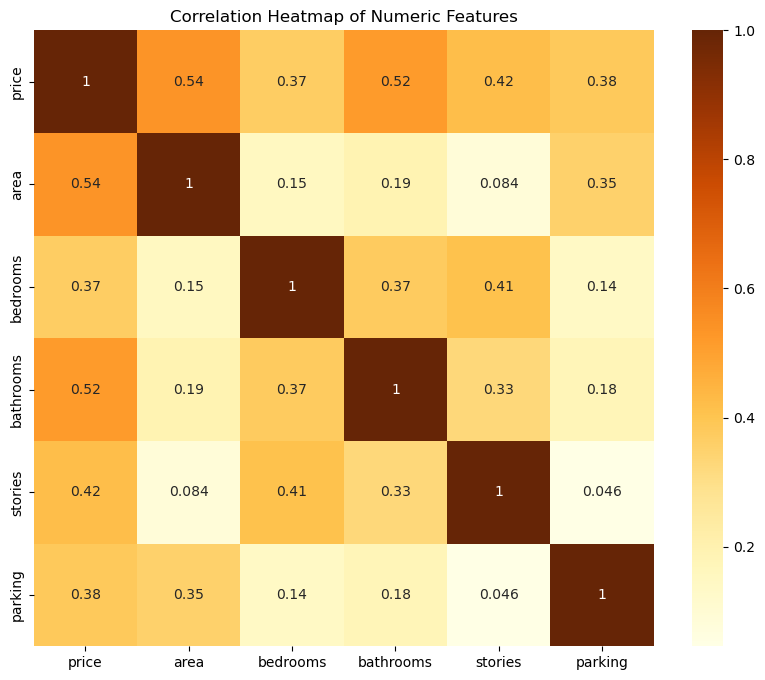

In [93]:
numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', ]
numeric_data = df[numeric_features]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [94]:
X=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
Y=df['price']
X=pd.get_dummies(X,drop_first=True)

In [95]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [96]:
model=LinearRegression()

In [97]:
model.fit(X_train,Y_train)

LinearRegression()

In [98]:
Y_pred=model.predict(X_test)

In [99]:
mae=mean_absolute_error(Y_test,Y_pred)
print('Mean_Absolute_Error:',mae)

Mean_Absolute_Error: 970043.4039201637


In [100]:
rmse=np.sqrt(mean_absolute_error(Y_test,Y_pred))
print('Root_Mean_Squared_Error:',rmse)

Root_Mean_Squared_Error: 984.9078149350647


In [101]:
accuracy=model.score(X_test,Y_test)
print('Accuracy:',accuracy)

Accuracy: 0.6529242642153186
